# Berkeley Single Blood Cell Microscopy (BSBCM) dataset

In [1]:
%load_ext autoreload
%autoreload 2

from bsbcm import BSBCM
from pathlib import Path

home = str(Path.home())
data_root = home + '/leukosight_data/'

dataset = BSBCM(data_root)

## Dataset overview

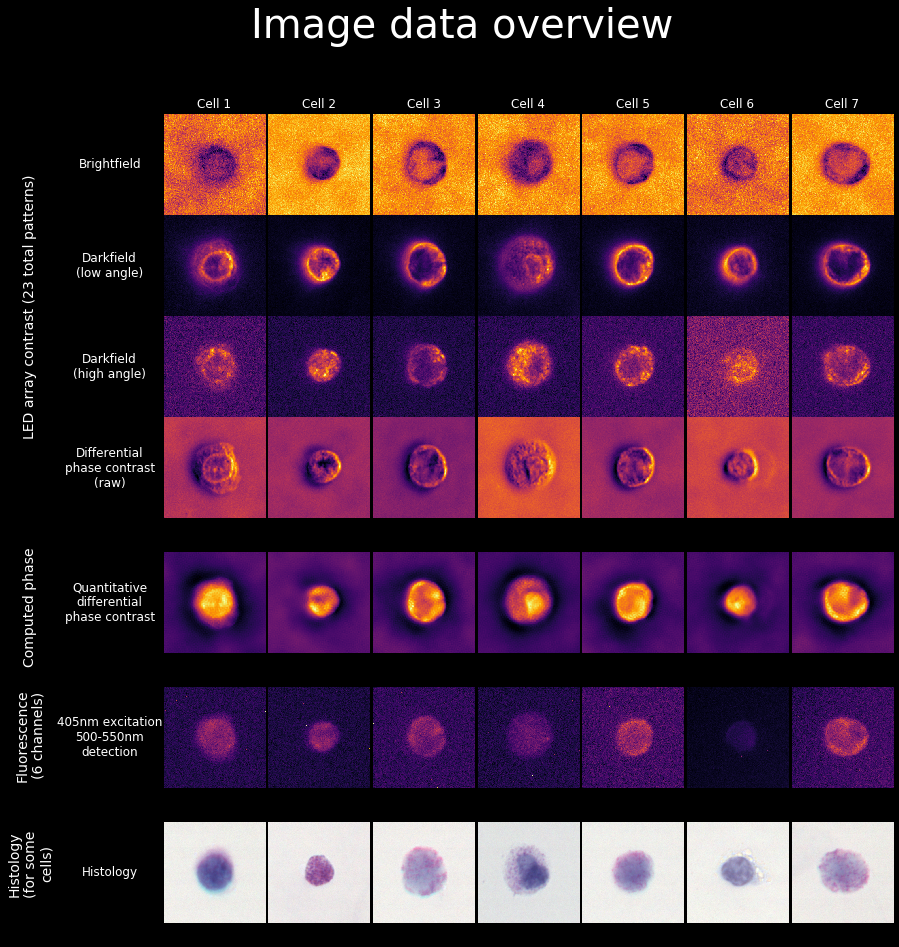

In [2]:
from led_array_calibration import plot_led_pattern
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches


num_cols = 8
cell_indices = dataset.get_indices(has_matched_histology=True, shuffle=True)[:num_cols - 1]

contrast_types = ['led_array', 'led_array', 'led_array', 'led_array', 'dpc', 'fluor', 'histology']
channels = ['Brightfield', 'DF_50', 'DF_80', 'DPC_Left', None, 'F5_BV510', None]
channel_display = ['Brightfield', 'Darkfield\n(low angle)',
                   'Darkfield\n(high angle)', 'Differential\nphase contrast\n(raw)',
                   'Quantitative\ndifferential\nphase contrast', '405nm excitation\n500-550nm\ndetection', 'Histology']


num_rows = 7
gs = gridspec.GridSpec(2, num_cols, wspace=0., hspace=0.)
gs_top = gs[0, :].subgridspec(4, num_cols, wspace=0., hspace=0.)
gs_bottom = gs[1, :].subgridspec(12, num_cols, wspace=0., hspace=0.)

fig = plt.figure(figsize=(15, num_rows / num_cols * 17))
fig.set_facecolor('black')
for i in range(num_rows):
    if i < 4:
        gs = gs_top
        ax = plt.subplot(gs[i, 0], facecolor='black')
    else:
        gs = gs_bottom
        ax = plt.subplot(gs[1 + 4*(i - 4):4*(i - 3), 0], facecolor='black')
    
    ax.text(0.5, 0.5, channel_display[i], horizontalalignment='center', verticalalignment='center',
                color='white', size=12)
        
    for j, index in enumerate(cell_indices):
        img = dataset.read_image(index=index, contrast_type=contrast_types[i], channel=channels[i])
        if i < 4:
            ax = plt.subplot(gs[i % 4, 1 + j], facecolor='black')
        else:
            ax = plt.subplot(gs[1 + 4 * (i - 4):4 + 4 * (i - 4), 1 + j], facecolor='black')
        ax.set_axis_off()
        if contrast_types[i] == 'histology':
            ax.imshow(img / (2 ** 12))
        else:
            ax.imshow(img, cmap='inferno')

        if i == 0:
            ax.set_title('Cell {}'.format(j + 1), color='white')
        
#Add labels
fig.text(0.1, 0.7, 'LED array contrast (23 total patterns)', 
         horizontalalignment='center', verticalalignment='center',
         rotation='vertical', color='white', size=14)
fig.text(0.1, 0.42, 'Computed phase', 
         horizontalalignment='center', verticalalignment='center',
         rotation='vertical', color='white', size=14)
fig.text(0.1, 0.3, 'Fluorescence\n(6 channels)', 
         horizontalalignment='center', verticalalignment='center',
         rotation='vertical', color='white', size=14)
fig.text(0.1, 0.18, 'Histology\n(for some\ncells)', 
         horizontalalignment='center', verticalalignment='center',
         rotation='vertical', color='white', size=14)
_ = fig.suptitle('Image data overview', color='white', size=40)

## Show an image of a random cell in quantitative differential phase contrast

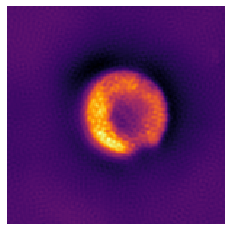

In [12]:
import numpy as np
import matplotlib.pyplot as plt

random_index = np.random.choice(np.arange(dataset.size))
image = dataset.read_image(random_index, contrast_type='dpc')
plt.figure()
plt.imshow(image, cmap='inferno')
plt.gca().set_axis_off()

## Show a montage of many random cells

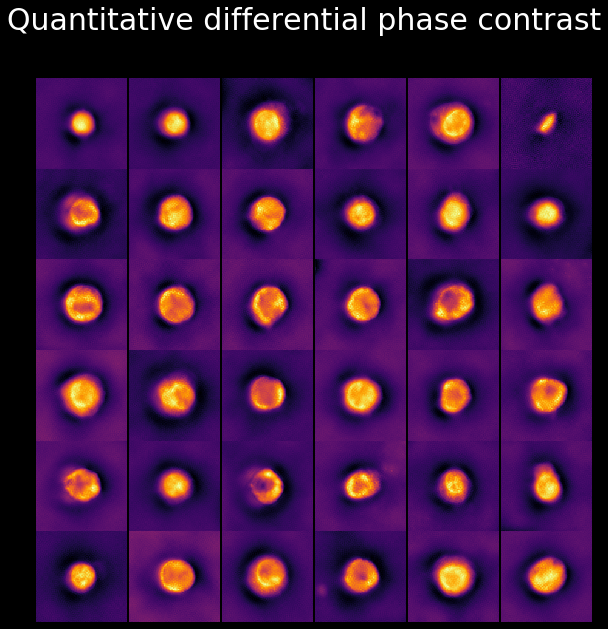

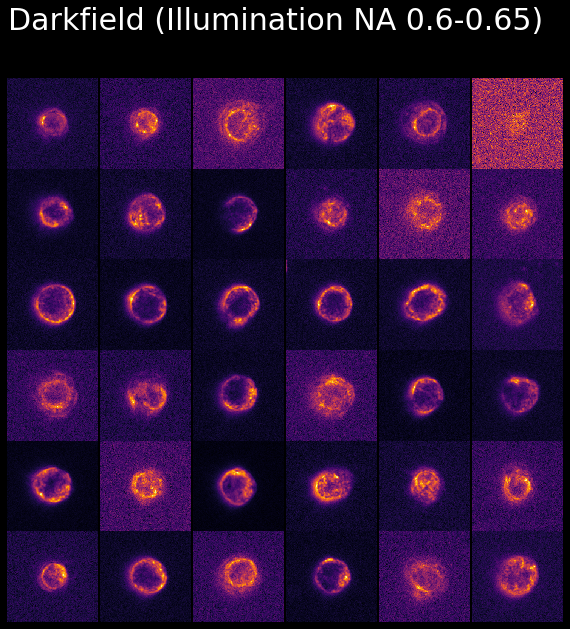

In [189]:
indices = np.random.choice(np.arange(dataset.size), size=36)

dataset.plot_montage(indices, contrast_type='dpc')
plt.gcf().suptitle('Quantitative differential phase contrast', fontsize=30, color='white')
plt.gcf().set_facecolor('black')
dataset.plot_montage(indices, contrast_type='led_array', channel='DF_60')
plt.gcf().suptitle('Darkfield (Illumination NA 0.6-0.65)', fontsize=30, color='white')
plt.gcf().set_facecolor('black')

## Plot a montage of cells with histology stain contrast

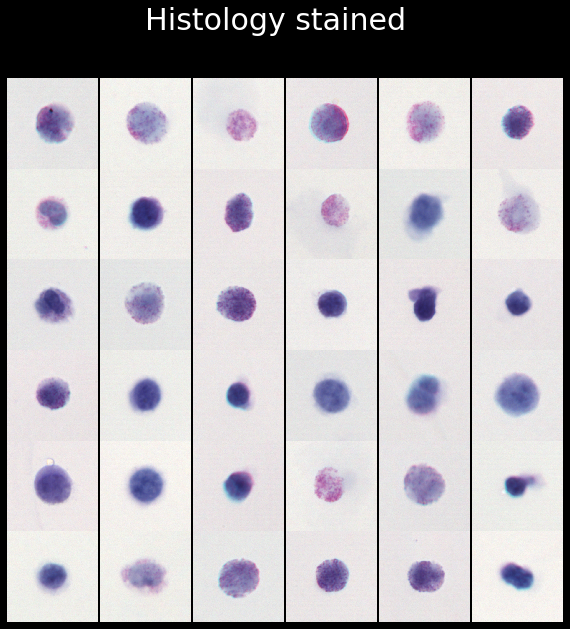

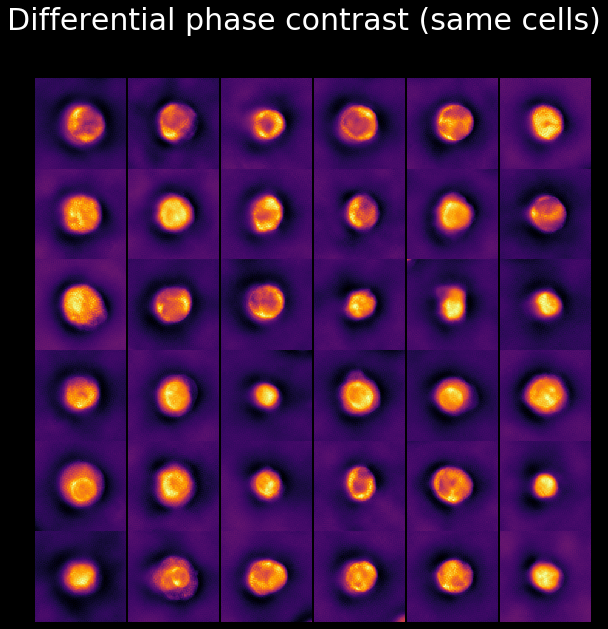

In [27]:
#Find a random set of indices for cells that have matched histology images
indices = dataset.get_indices(has_matched_histology=True, shuffle=True)[:36]
dataset.plot_montage(indices, contrast_type='histology')
plt.gcf().suptitle('Histology stained', fontsize=30, color='white')
plt.gcf().set_facecolor('black')
dataset.plot_montage(indices, contrast_type='dpc')
plt.gcf().suptitle('Differential phase contrast (same cells)', fontsize=30, color='white')
plt.gcf().set_facecolor('black')

## LED array contrasts

In [28]:
# Print all available channels for LED array images
print('\n'.join(dataset.led_array_channel_names))

Brightfield
DF_50
DF_50_Bottom
DF_50_Right
DF_55
DF_60
DF_60_Bottom
DF_60_Right
DF_65
DF_70
DF_70_Bottom
DF_70_Right
DF_75
DF_80
DF_80_Bottom
DF_80_Right
DF_85
DF_90
DPC_Bottom
DPC_Left
DPC_Right
DPC_Top
LED119


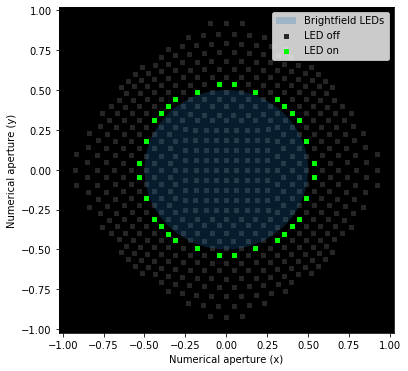

In [29]:
from led_array_calibration import plot_led_pattern, illumination_to_led_indices, get_led_na_xy, get_led_na

plt.figure(figsize=(6,6))
plot_led_pattern(channel_name='DF_50', size=20)

dpc_top_leds = illumination_to_led_indices('DPC_Top')

na_xy = get_led_na_xy(dpc_top_leds)

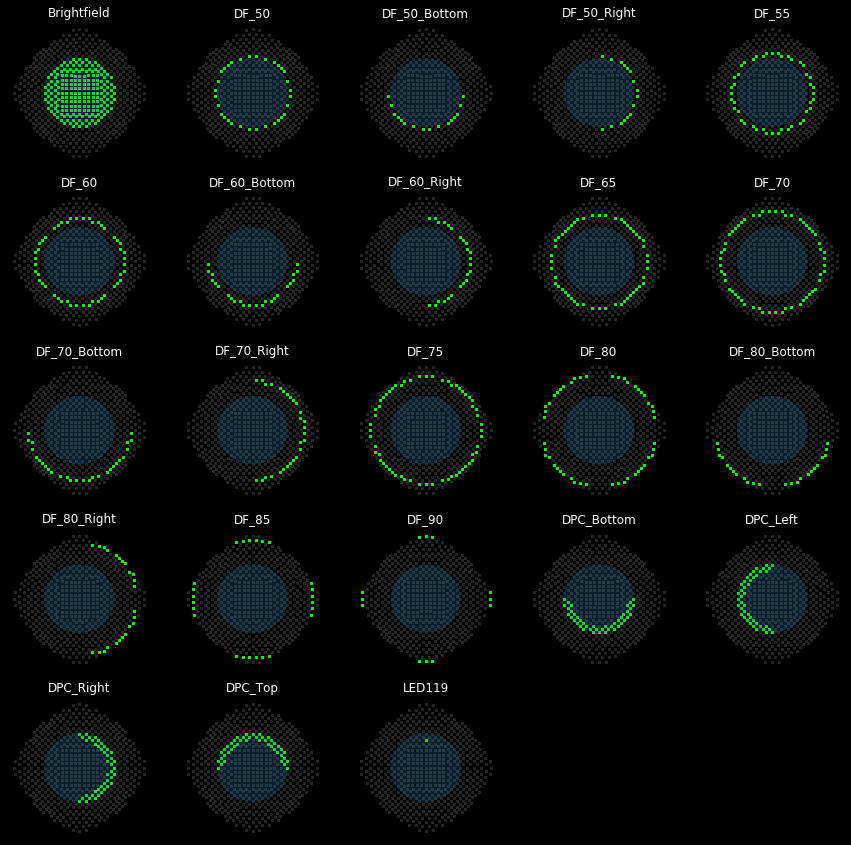

In [30]:
from led_array_calibration import plot_led_pattern
import matplotlib.pyplot as plt

channel_names = dataset.led_array_channel_names

fig = plt.figure(figsize=(15,15))
for i in range(23):
    ax = plt.subplot(5, 5, i + 1)
    plot_led_pattern(channel_name=channel_names[i], ax=ax, legend=False, size=8)
    ax.set_title(channel_names[i], color='white')
    ax.set_axis_off()
fig.set_facecolor('black')

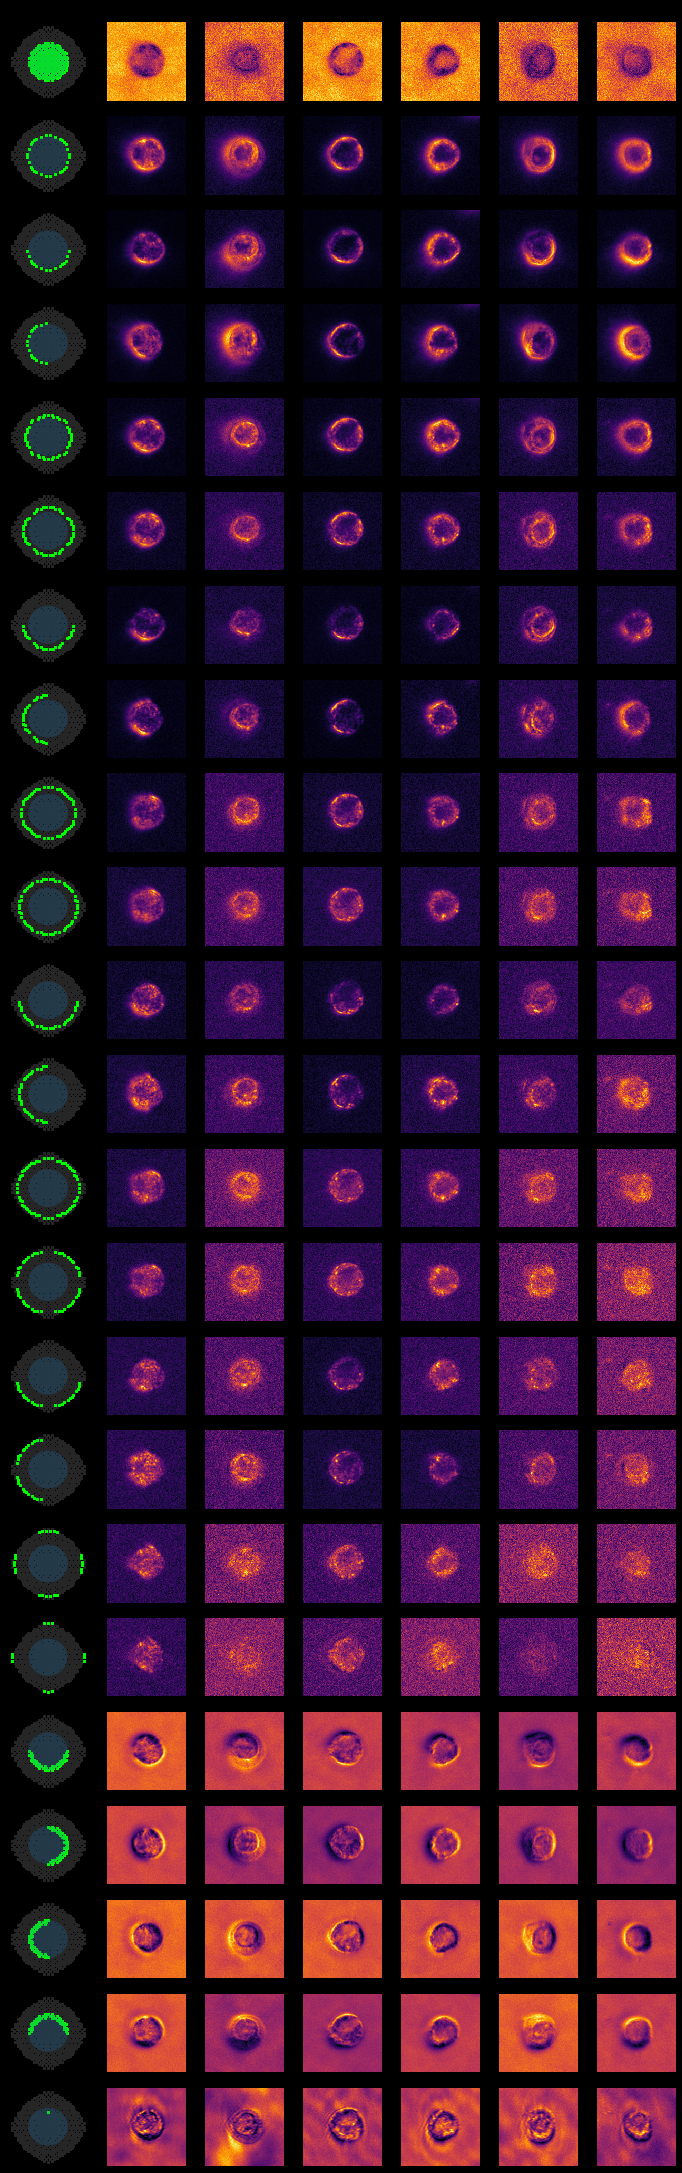

In [43]:
from led_array_calibration import plot_led_pattern
import matplotlib.pyplot as plt

channel_names = dataset.led_array_channel_names

num_cols = 7
cell_indices = np.random.choice(np.arange(dataset.size), size=num_cols - 1)

fig = plt.figure(figsize=(12, 23 / num_cols * 12))
fig.set_facecolor('black')
for i in range(23):
    ax = plt.subplot(23, num_cols, i * num_cols + 1)
    plot_led_pattern(channel_name=channel_names[i], ax=ax, legend=False, size=8)
    ax.set_xlabel(channel_names[i], color='white')
    ax.set_axis_off()
    
    for j, index in enumerate(cell_indices):
        img = dataset.read_image(index=index, contrast_type='led_array', channel=channel_names[i])
        ax = plt.subplot(23, num_cols, i * num_cols + 2 + j)
        ax.imshow(img, cmap='inferno')
        ax.set_axis_off()
        if i == 0:
            ax.set_title('Cell {}'.format(j + 1))

## TODO: fluor channel names
The F1 indicates the order in which they were selected
TODO: add filter and illumination information

In [45]:
dataset.fluor_channel_names

['F1_BV711', 'F2_BV650', 'F3_BV605', 'F4_BV570', 'F5_BV510', 'F6_BV421']